<a href="https://colab.research.google.com/github/fernandanlisboa/clustering_countries/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Componentes

*    Davi Costa
*    Fernanda Lisboa
*    João Felipe
*    Maria Amado

# Config

In [ ]:
!pip install -U pandas-profiling[notebook]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=30b36b9c1d065d0101062df6efb506c39aae9907eec559af134be33ce6e011aa
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


## Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive_path = '/content/drive'
directory = f'{drive_path}/MyDrive/Desafio 02 - Agrupamento'
csv_file = 'Country-data.csv'

In [ ]:
drive.mount(drive_path)

Mounted at /content/drive


# Getting Data

O dataset utilizado foi disponibilizado pelo professor Braian através do site https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data e esssa base de dados traz indices geopolíticos e socioeconômicos de 167 países do mundo.

In [ ]:
df = pd.read_csv(f"{directory}/{csv_file}")

In [ ]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [ ]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Nem

In [ ]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Pandas report

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-11-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
report = ProfileReport(df, title="Pandas Profiling Report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Quão correlacioandas estão os atributos?

In [ ]:
corr=df.corr(method="kendall")


<ipython-input-33-d5cf2de347fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method="kendall")


In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

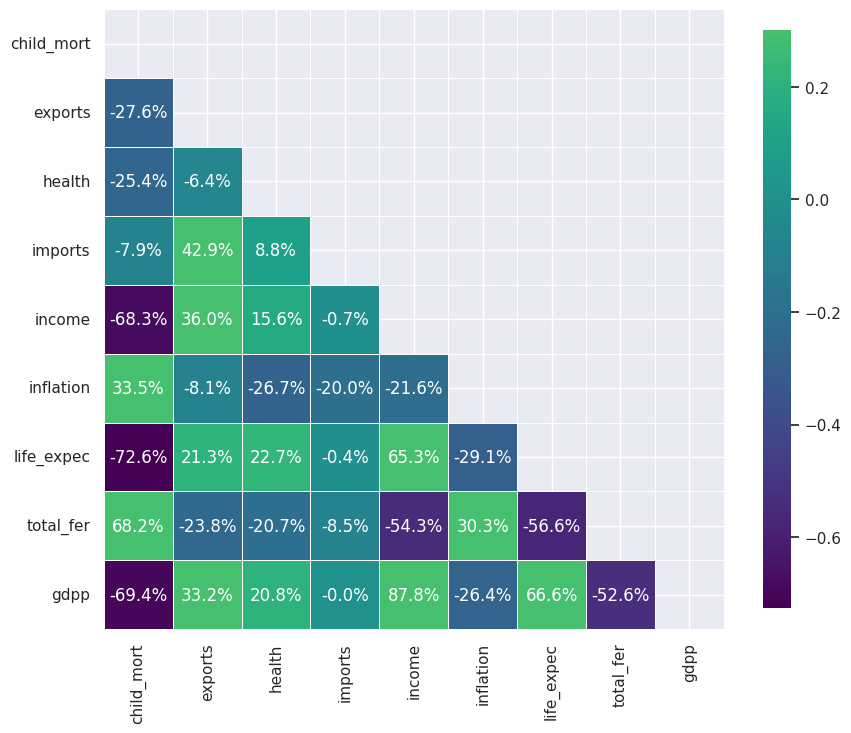

In [ ]:
sns.set(rc={'figure.figsize':(10,15)})
sns.heatmap(corr, mask=mask, cmap="viridis", vmax=.3, center=0,
             fmt=".1%",square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



Matriz de correlação gerada utilizando o método de Kendall por conta da falta de normalização dos dados nessa etapa. As baixas correlações desse dataset indicam dados inversamente proporcionais.

# Buscando por outliers

In [ ]:
cols_tonorm = df.drop(columns='country').columns.tolist()

In [ ]:
def plot_boxplots(df, columns_name):
  rows, cols = 3, 3
  count = 0
  fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
  for r in range(rows):
    for c in range(cols):
      # df.boxplot(column=[columns_name[count]], ax=axes[r, c])
      sns.boxplot(ax=axes[r, c], data=df, x=columns_name[count])
      axes[r, c].set_title(f"\n\n{columns_name[count]}", fontsize=8)

      count = count + 1
      if count == len(columns_name):
        break
  plt.suptitle("Boxplot of each column")
  plt.show()

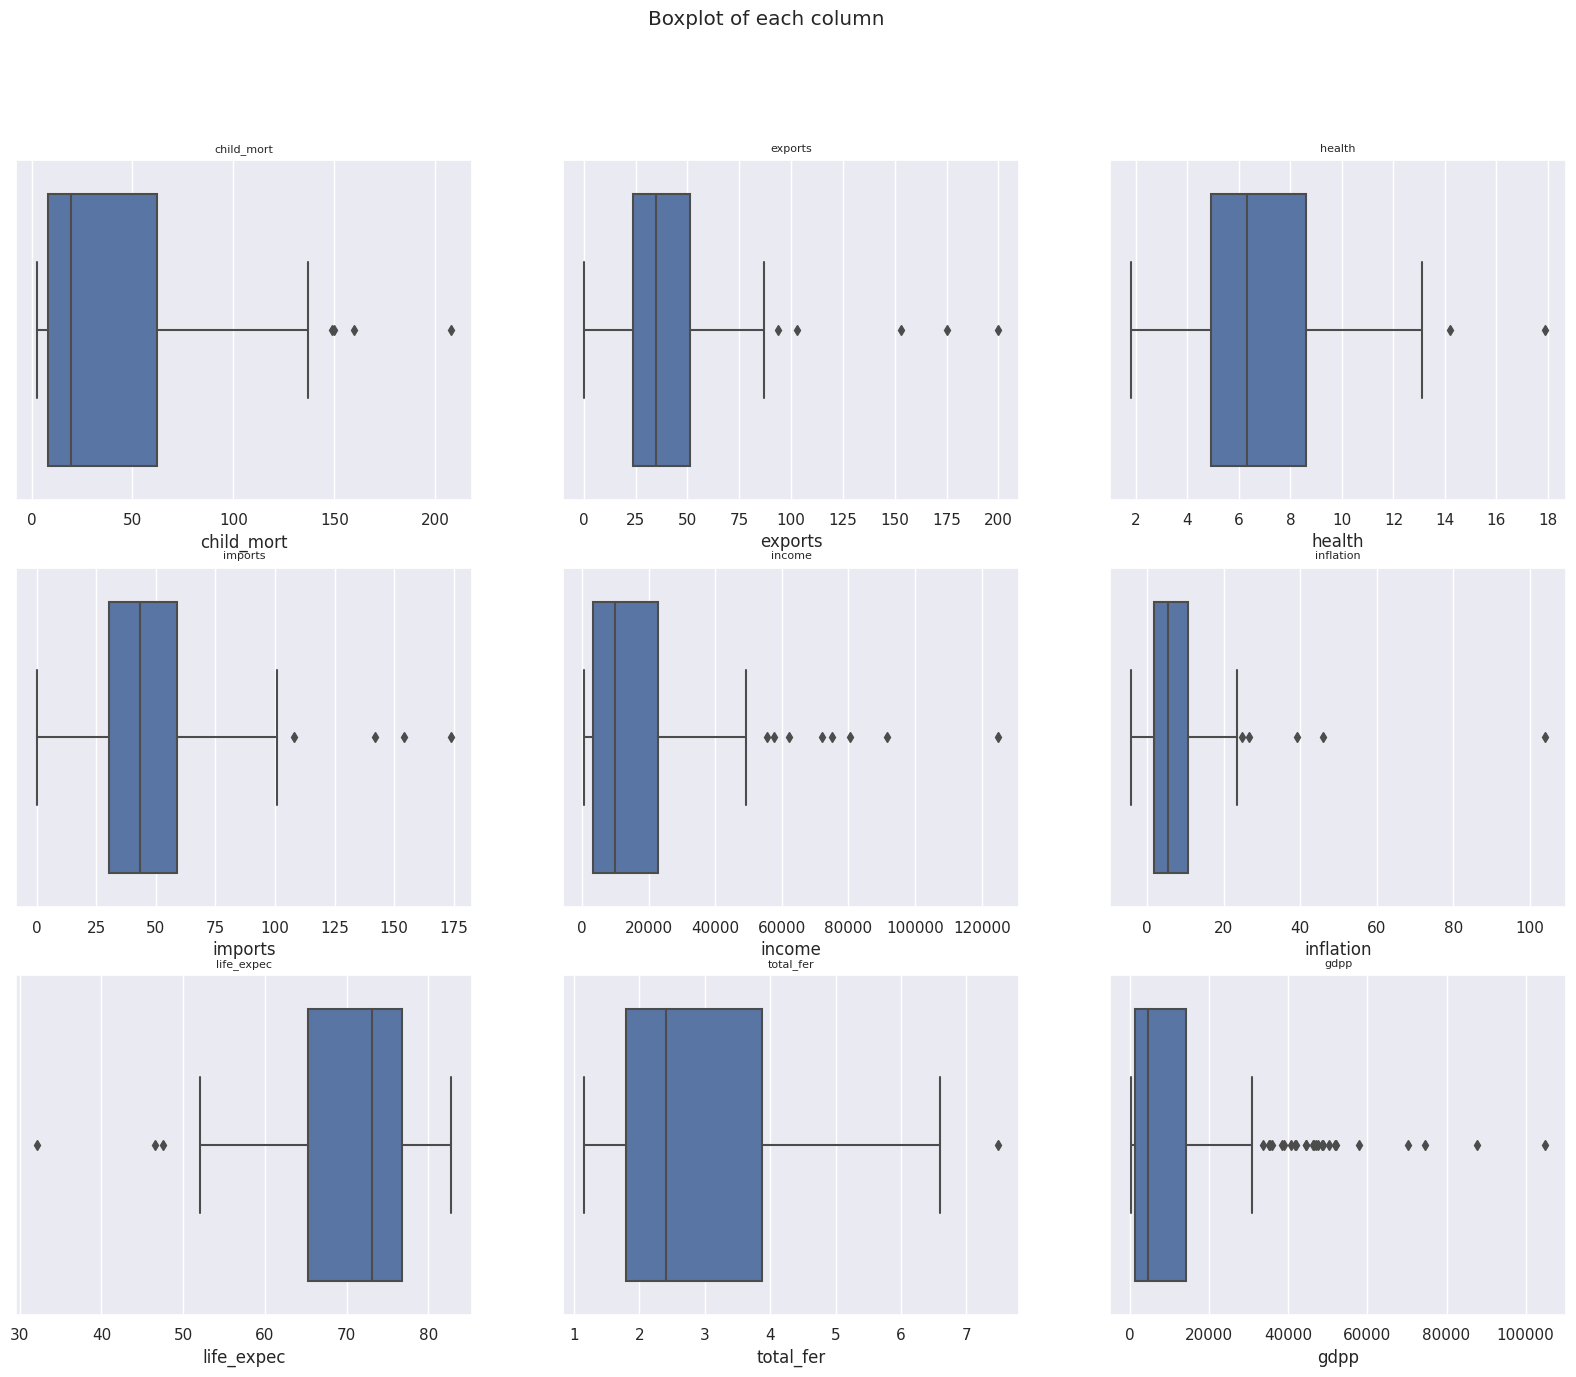

In [ ]:
plot_boxplots(df, cols_tonorm)

A partir da visualização do boxplot acima, nota-se que existem muitos possíveis outliers, pricipalmente no atributo gdpp. Então, antes de agrupar os dados, é necessário aplicar uma técnica de padronização que suaviza os outliers.

# Valores diferenciados

In [ ]:
df.loc[df['inflation'] < 0]

country  child_mort  exports  health  imports  income  inflation  \
10          Bahamas        13.8     35.0    7.89     43.7   22900     -0.393   
43   Czech Republic         3.4     66.0    7.88     62.9   28300     -1.430   
73          Ireland         4.2    103.0    9.19     86.5   45700     -3.220   
77            Japan         3.2     15.0    9.49     13.6   35800     -1.900   
85           Latvia         7.8     53.7    6.68     55.1   18300     -0.812   
131      Seychelles        14.4     93.8    3.40    108.0   20400     -4.210   
133       Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
135        Slovenia         3.2     64.3    9.41     62.9   28700     -0.987   

     life_expec  total_fer   gdpp  
10         73.8       1.86  28000  
43         77.5       1.51  19800  
73         80.4       2.05  48700  
77         82.8       1.39  44500  
85         73.1       1.36  11300  
131        73.4       2.17  10800  
133        82.7       1.15  46600  
135        79.5       1.57  23400

Inflação negativa significa que o país está, na verdade, com deflação. Observando as poucas instâncias que apresentam esse comportamento, percebemos que apenas países considerados ricos se encontram com esse tipo de comportamento em nossa base.

# Olhando as observações com pontos afastados

In [ ]:
from IPython.display import display

In [ ]:
def print_outliers_obs(df, col, min_=None, max_=None):
  print(f'\ncoluna: {col}')
  if max_ != None:
    print('Maiores')
    upper_data = df.loc[df[col] > max_]
    display(upper_data.style)
    print(f"{upper_data.shape[0]} instâncias maiores")
  else:
    print('Sem outliers acima do maior valor concentrado')
  if min_ != None:
    print('Menores')
    lower_data = df.loc[df[col] < min_]
    display(lower_data.style)
    print(f"{lower_data.shape[0]} instâncias menores")
  else:
    print('Sem outliers abaixo do maior valor concentrado')

## Dados não normalizados

Outliers menores e maiores do que o intervalo de distribuição dos dados

In [ ]:
print_outliers_obs(df, 'child_mort', max_=140)


coluna: child_mort
Maiores


4 instâncias maiores
Sem outliers abaixo do maior valor concentrado


Visualizando as instâncias distantes da concentração dos dados apenas para mortalidade infantil, observamos que apenas países com GDPP baixo se encontram com essa característica. Além disso, a expectativa de vida nesses países também é baixa.

In [ ]:
print_outliers_obs(df, 'exports', max_=80)


coluna: exports
Maiores


9 instâncias maiores
Sem outliers abaixo do maior valor concentrado


Apenas outliers acima do maior valor de distribuição dos dados de exportação foram encontrados. Ao visualizar quais são os países dessas instâncias, percebemos que há uma variação dos países, seja pelos valores de GDPP que possuem, alguns muito altos, já outros um pouco mais baixos, como República do Congo.
Observando o maior outlier de todos, Singapura possui a maior receita de exportações, entretanto seu GDPP não é tão alto, e isso pode ser devido à justamente o seu alto valor de importações também, já que o cálculo do GDPP também leva em consideração essas duas variáveis.

É interessante inferir que países que se destacam por possuírem altos valores de exportação, não necessariamente são os de maior GDPP ou menor inflação.

In [ ]:
print_outliers_obs(df, 'health', max_=13)


coluna: health
Maiores


3 instâncias maiores
Sem outliers abaixo do maior valor concentrado


In [ ]:
print_outliers_obs(df, 'imports', max_=100)


coluna: imports
Maiores


5 instâncias maiores
Sem outliers abaixo do maior valor concentrado


In [ ]:
print_outliers_obs(df, 'income', max_=50000)


coluna: income
Maiores


8 instâncias maiores
Sem outliers abaixo do maior valor concentrado


In [ ]:
print_outliers_obs(df, 'inflation', max_=22)


coluna: inflation
Maiores


8 instâncias maiores
Sem outliers abaixo do maior valor concentrado


In [ ]:
print_outliers_obs(df, 'life_expec', min_=50)


coluna: life_expec
Sem outliers acima do maior valor concentrado
Menores


3 instâncias menores


In [ ]:
print_outliers_obs(df, 'total_fer', max_=7)


coluna: total_fer
Maiores


1 instâncias maiores
Sem outliers abaixo do maior valor concentrado


In [ ]:
print_outliers_obs(df, 'gdpp', max_=30000)


coluna: gdpp
Maiores


28 instâncias maiores
Sem outliers abaixo do maior valor concentrado
